Import libraries , Install packages

In [160]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.feature_selection import f_regression
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from scipy import stats
import numpy as npz
import os
import seaborn as sns
from pandas import read_csv
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
# from catboost import CatBoostRegressor
# !pip install lightgbm
from lightgbm import LGBMRegressor
# !pip install xgboost

from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE


%matplotlib inlinepd.set_option('float_format', '{:f}'.format)

UsageError: unrecognized arguments: '{:f}'.format)


Input

In [161]:
df_input = pd.read_csv(r'C:\Users\md.bahauddin\OneDrive - o9 Solutions\DS Compi Hacker Earth\Input files\train.csv')
df_input.head()




,Property_ID,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score
0,0x21e3,Apartment,106,NaN,1,Semi_Furnished,0.0,No,Once in a day - Morning,5.89,Slightly below average,Medium,90.0,3.86,71.98
1,0x68d4,Apartment,733,2.0,2,Unfurnished,1.0,No,Once in a day - Evening,4.37,Well below average,Medium,96.0,3.55,71.20
2,0x7d81,Apartment,737,4.0,2,Fully Furnished,0.0,No,Once in a day - Morning,7.45,Slightly below average,Medium,121.0,3.81,71.39
3,0x7a57,Apartment,900,3.0,2,Unfurnished,2.0,Yes,Once in a day - Morning,6.16,Well above average,Medium,100.0,1.34,31.46
4,0x9409,Bungalow,2238,14.0,6,Fully Furnished,0.0,No,All time,5.46,Well below average,Medium,116.0,4.77,93.70


In [162]:
#TEST
test_input = pd.read_csv(r'C:\Users\md.bahauddin\OneDrive - o9 Solutions\DS Compi Hacker Earth\Input files\test.csv')
X=test_input['Property_ID']
test_input.head()

,Property_ID,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review
0,0x7cbc,Container Home,361,0.0,2,Fully Furnished,3.0,No,All time,7.22,Well below average,Medium,159,2.83
1,0x6082,Apartment,508,1.0,1,Fully Furnished,3.0,No,All time,6.04,Well below average,Medium,164,2.83
2,0x58d6,Container Home,483,1.0,2,Fully Furnished,3.0,No,All time,5.79,Slightly below average,Medium,81,2.31
3,0x2e2b,Single-family home,2177,2.0,2,Fully Furnished,3.0,No,All time,6.61,Well below average,Medium,124,2.87
4,0xc7b1,Single-family home,1355,2.0,2,Fully Furnished,3.0,No,All time,7.37,Well below average,Medium,131,2.86


In [163]:
# # processing property_type 
df_input = df_input[~df_input['Property_Type'].isin(["#R%$G&867"])]
df_input[['property_type_Apartment','property_type_Single-family home','property_type_Duplex','property_type_Bungalow','property_type_Container Home']] = pd.get_dummies(df_input['Property_Type'])
df_input.drop('Property_Type',inplace=True,axis=1)
# df_input['Property_Type'].value_counts()

df_input.head()
# df_input.shape

,Property_ID,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score,property_type_Apartment,property_type_Single-family home,property_type_Duplex,property_type_Bungalow,property_type_Container Home
0,0x21e3,106,NaN,1,Semi_Furnished,0.0,No,Once in a day - Morning,5.89,Slightly below average,Medium,90.0,3.86,71.98,1,0,0,0,0
1,0x68d4,733,2.0,2,Unfurnished,1.0,No,Once in a day - Evening,4.37,Well below average,Medium,96.0,3.55,71.20,1,0,0,0,0
2,0x7d81,737,4.0,2,Fully Furnished,0.0,No,Once in a day - Morning,7.45,Slightly below average,Medium,121.0,3.81,71.39,1,0,0,0,0
3,0x7a57,900,3.0,2,Unfurnished,2.0,Yes,Once in a day - Morning,6.16,Well above average,Medium,100.0,1.34,31.46,1,0,0,0,0
4,0x9409,2238,14.0,6,Fully Furnished,0.0,No,All time,5.46,Well below average,Medium,116.0,4.77,93.70,0,1,0,0,0


In [164]:
# Test processing
# #  property_type 
test_input = test_input[~test_input['Property_Type'].isin(["#R%$G&867"])]
test_input[['property_type_Apartment','property_type_Single-family home','property_type_Duplex','property_type_Bungalow','property_type_Container Home']] = pd.get_dummies(test_input['Property_Type'])
test_input.drop('Property_Type',inplace=True,axis=1)
# df_input['Property_Type'].value_counts()

test_input.head()
# df_input.shape

,Property_ID,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,property_type_Apartment,property_type_Single-family home,property_type_Duplex,property_type_Bungalow,property_type_Container Home
0,0x7cbc,361,0.0,2,Fully Furnished,3.0,No,All time,7.22,Well below average,Medium,159,2.83,0,0,1,0,0
1,0x6082,508,1.0,1,Fully Furnished,3.0,No,All time,6.04,Well below average,Medium,164,2.83,1,0,0,0,0
2,0x58d6,483,1.0,2,Fully Furnished,3.0,No,All time,5.79,Slightly below average,Medium,81,2.31,0,0,1,0,0
3,0x2e2b,2177,2.0,2,Fully Furnished,3.0,No,All time,6.61,Well below average,Medium,124,2.87,0,0,0,0,1
4,0xc7b1,1355,2.0,2,Fully Furnished,3.0,No,All time,7.37,Well below average,Medium,131,2.86,0,0,0,0,1


In [165]:
# Proprty Area  
    # No need to clean 

In [166]:
# Number_of_Windows 
df_input = df_input[~df_input['Number_of_Windows'].isna()]
# df_input.info()

In [167]:
# Test processing
test_input = test_input[~test_input['Number_of_Windows'].isna()]


In [168]:
# Number_of_Doors 
    # No need to clean it 
# df_input['Number_of_Doors']
# df_input.info()


In [169]:
# Power_Backup 
df_input = df_input[~df_input['Power_Backup'].isin(['NOT MENTIONED'])]
df_input[['Power_Backup_1','Power_Backup_2']] = pd.get_dummies(df_input['Power_Backup'])  
df_input.drop('Power_Backup',axis=1,inplace=True)
df_input.columns
# df_input.info()
# df_input.shape 


#Test processing
test_input = test_input[~test_input['Power_Backup'].isin(['NOT MENTIONED'])]
test_input[['Power_Backup_1','Power_Backup_2']] = pd.get_dummies(test_input['Power_Backup'])  
test_input.drop('Power_Backup',axis=1,inplace=True)

In [170]:
# Frequency of power cuts 
df_input = df_input[~df_input['Frequency_of_Powercuts'].isna()]
# df_input['Frequency_of_Powercuts'].value_counts ()

#Test processing
test_input = test_input[~test_input['Frequency_of_Powercuts'].isna()]

In [171]:
# Water supply  
df_input = df_input[~df_input['Water_Supply'].isin(['NOT MENTIONED'])]
df_input['Water_Supply'].unique()
df_input[['Water_Supply-Once in a day - Evening','Water_Supply-Once in a day - Morning','Water_Supply-All time','Water_Supply-Once in two days']] = pd.get_dummies(df_input['Water_Supply'])
df_input.drop('Water_Supply',axis=1,inplace=True)
# df_input.info()



#Test processing
test_input = test_input[~test_input['Water_Supply'].isin(['NOT MENTIONED'])]
test_input[['Water_Supply-Once in a day - Evening','Water_Supply-Once in a day - Morning','Water_Supply-All time','Water_Supply-Once in two days']] = pd.get_dummies(test_input['Water_Supply'])
test_input.drop('Water_Supply',axis=1,inplace=True)


In [172]:
# Crime_Rate 
df_input = df_input[~df_input['Crime_Rate'].isna()]
df_input[['Crime_Rate_Well below average', 'Crime_Rate_Slightly below average',
       'Crime_Rate_Well above average', 'Crime_Rate_Slightly above average']] = pd.get_dummies(df_input['Crime_Rate'])
df_input.drop('Crime_Rate',axis=1,inplace=True)
# df_input['Crime_Rate'].unique()
df_input.info()



#Test processing
test_input = test_input[~test_input['Crime_Rate'].isna()]
test_input[['Crime_Rate_Well below average', 'Crime_Rate_Slightly below average', 'Crime_Rate_Well above average', 'Crime_Rate_Slightly above average']] = pd.get_dummies(test_input['Crime_Rate'])
test_input.drop('Crime_Rate',axis=1,inplace=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 34294 entries, 1 to 39498
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Property_ID                           34294 non-null  object 
 1   Property_Area                         34294 non-null  int64  
 2   Number_of_Windows                     34294 non-null  float64
 3   Number_of_Doors                       34294 non-null  int64  
 4   Furnishing                            33397 non-null  object 
 5   Frequency_of_Powercuts                34294 non-null  float64
 6   Traffic_Density_Score                 34294 non-null  float64
 7   Dust_and_Noise                        33229 non-null  object 
 8   Air_Quality_Index                     34294 non-null  float64
 9   Neighborhood_Review                   34294 non-null  float64
 10  Habitability_score                    34294 non-null  float64
 11  property_type_A

<AxesSubplot:>

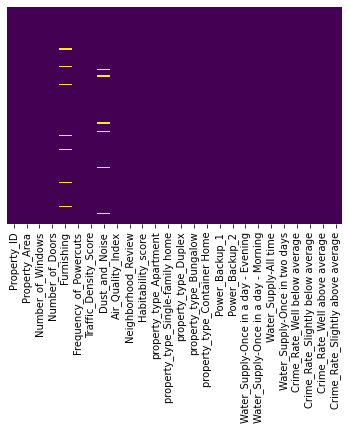

In [173]:
sns.heatmap(df_input.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [174]:
df_input['Dust_and_Noise'].value_counts()
df_input.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34294 entries, 1 to 39498
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Property_ID                           34294 non-null  object 
 1   Property_Area                         34294 non-null  int64  
 2   Number_of_Windows                     34294 non-null  float64
 3   Number_of_Doors                       34294 non-null  int64  
 4   Furnishing                            33397 non-null  object 
 5   Frequency_of_Powercuts                34294 non-null  float64
 6   Traffic_Density_Score                 34294 non-null  float64
 7   Dust_and_Noise                        33229 non-null  object 
 8   Air_Quality_Index                     34294 non-null  float64
 9   Neighborhood_Review                   34294 non-null  float64
 10  Habitability_score                    34294 non-null  float64
 11  property_type_A

In [175]:
# Furnishing 
df_input = df_input[~df_input['Furnishing'].isin(['NA'])]
df_input = df_input[~df_input['Furnishing'].isna()]
#df_input['Furnishing'].unique()
df_input[['Semi_Furnished','Unfurnished','Fully Furnished']] = pd.get_dummies(df_input['Furnishing'])
df_input.drop('Furnishing',axis=1,inplace=True)
# df_input.info()

#Test processing
test_input = test_input[~test_input['Furnishing'].isin(['NA'])]
test_input = test_input[~test_input['Furnishing'].isna()]
test_input[['Semi_Furnished','Unfurnished','Fully Furnished']] = pd.get_dummies(test_input['Furnishing'])
test_input.drop('Furnishing',axis=1,inplace=True)

In [176]:
# Dust_and_Noise 
df_input = df_input[~df_input['Dust_and_Noise'].isna()]
#df_input['Dust_and_Noise'].unique()
df_input[['Dust_Medium','Dust_High','Dust_Low']] = pd.get_dummies(df_input['Dust_and_Noise'])
df_input.drop('Dust_and_Noise',axis=1,inplace=True)

# test 
test_input = test_input[~test_input['Dust_and_Noise'].isna()]
test_input[['Dust_Medium','Dust_High','Dust_Low']] = pd.get_dummies(test_input['Dust_and_Noise'])
test_input.drop('Dust_and_Noise',axis=1,inplace=True)

In [177]:
df_input_cleaned = df_input.copy(deep=True)
df_input_cleaned.drop('Property_ID',axis=1,inplace=True)
df_input_cleaned.head()

#TEST
test_cleaned = test_input.copy(deep=True)
# test_cleaned.drop('Property_ID',axis=1,inplace=True)
# test_cleaned.head()

In [178]:
    
    cor = df_input_cleaned.corr()
    # using pearson correlation
    # plt.figure(figsize=(100,100))
    # Corr_df.drop('Month',inplace=True,axis=1)
    # cor = df.corr()
    # print(cor)
    # sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
    # plt.show()
    # cor.to_excel(r'C:\Users\md.bahauddin\OneDrive - o9 Solutions\DS Compi Hacker Earth\outputs\Correlations of features.xlsx')

Model Building Best Fit

In [181]:
from copy import deepcopy


def trainingbestfit(X_train,X_test,y_train,y_test):

    ######### 1. Random Forest  ############
    rf = RandomForestRegressor(n_estimators=500)
    rf.fit(X_train, y_train)
    rf_pred = rf.predict(X_test)
    # Error 
    # R2 score 
    # rf_r2score = r2_score(y_test,rf_pred)
    # print("RF R2 " ,rf_r2score)
    # # MAE 
    # rf_mae = MAE(y_test,rf_pred)
    # print("RF MAE ",rf_mae)
    # # output 
    output_rf = pd.DataFrame(list(zip(rf_pred,y_test)),columns={'RF Pred','Actual'})

    ######## 2. XGBoost ######################
    xg = XGBRegressor(n_estimators=500)
    xg.fit(X_train,y_train)
    XG_pred = xg.predict(X_test)
    # xg_r2score = r2_score(y_test,XG_pred)
    # print("XG R2 ",xg_r2score)
    # # MAE 
    # xg_mae = MAE(y_test,XG_pred)
    # print("XG MAE ", xg_mae)
    output_xg = pd.DataFrame(list(zip(XG_pred,y_test)),columns={'XG Pred','Actual'})
    #  print(output_xg)
    
    return output_rf, output_xg

Training the models


In [97]:
df_input_cleaned.head()
X_train, X_test, y_train, y_test = train_test_split(df_input_cleaned.drop('Habitability_score',axis=1),df_input_cleaned['Habitability_score'],test_size=0.15)

In [106]:
rf,xg = trainingbestfit(X_train,X_test,y_train,y_test)

RF R2  0.8317872408592346
RF MAE  4.414483584672433
XG R2  0.8003434352912071
XG MAE  4.852074617716723


Prediction 

In [184]:
df_input_cleaned.head()
X_train = df_input_cleaned.drop('Habitability_score',axis=1)
y_train = df_input_cleaned[['Habitability_score']]
X_test = test_cleaned.drop('Property_ID',axis=1)

In [185]:
X_train

,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,property_type_Apartment,property_type_Single-family home,property_type_Duplex,...,Crime_Rate_Well below average,Crime_Rate_Slightly below average,Crime_Rate_Well above average,Crime_Rate_Slightly above average,Semi_Furnished,Unfurnished,Fully Furnished,Dust_Medium,Dust_High,Dust_Low
1,733,2.0,2,1.0,4.37,96.0,3.55,1,0,0,...,0,0,0,1,0,0,1,0,0,1
2,737,4.0,2,0.0,7.45,121.0,3.81,1,0,0,...,0,1,0,0,1,0,0,0,0,1
3,900,3.0,2,2.0,6.16,100.0,1.34,1,0,0,...,0,0,1,0,0,0,1,0,0,1
4,2238,14.0,6,0.0,5.46,116.0,4.77,0,1,0,...,0,0,0,1,1,0,0,0,0,1
5,1185,3.0,3,0.0,5.69,91.0,4.49,0,0,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39491,4014,12.0,6,0.0,7.50,80.0,4.81,0,1,0,...,0,0,0,1,0,1,0,0,0,1
39492,3317,10.0,4,2.0,4.05,101.0,2.29,0,1,0,...,1,0,0,0,1,0,0,0,0,1
39495,445,1.0,3,1.0,5.70,86.0,2.93,1,0,0,...,1,0,0,0,1,0,0,0,0,1
39496,3780,6.0,6,0.0,6.84,137.0,3.80,0,1,0,...,0,0,0,1,0,0,1,0,0,1


In [186]:
    rf = RandomForestRegressor(n_estimators=500)
    rf.fit(X_train, y_train)
    rf_pred = rf.predict(X_test)
    # Error 
    # R2 score 
    # rf_r2score = r2_score(y_test,rf_pred)
    # print("RF R2 " ,rf_r2score)
    # # MAE 
    # rf_mae = MAE(y_test,rf_pred)
    # print("RF MAE ",rf_mae)
    # # output 
    # output_rf = pd.DataFrame(list(zip(rf_pred,y_test)),columns={'RF Pred','Actual'})

C:\Users\MDF851~1.BAH\AppData\Local\Temp/ipykernel_12136/1702514309.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


In [190]:
test_input['RF Pred'] = rf_pred

In [193]:
test_input.to_excel(r'C:\Users\md.bahauddin\OneDrive - o9 Solutions\DS Compi Hacker Earth\outputs\Output1.xlsx')